# 畳み込み処理を見てみる

畳み込み処理は直感的にも明らかに、「特徴を抽出」しているのが目に見えてわかります。例えばカーネルにはガウシアンフィルタとか縦微分フィルタや横微分フィルタなど様々なものがありますが、どれも名前の通りの結果が出力されます。百聞は一見にしかずので見てみましょう。

また、畳み込みは例えば3×3カーネルを使うと特徴マップは元画像より縦横ともに2ピクセルずつ小さくなりますが、cv2.filter2D(image, -1, kernel)はデフォルトでパディングを入れて大きさを同じに調節してくれます。0パディングをするそうです。ほかにも反射パディングとかもある(反対側と同じピクセル値を代入し端での連続性を作る)。

In [ ]:
!pip install pillow
!pip install opencv-python-headless

<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'numpy.ndarray'>


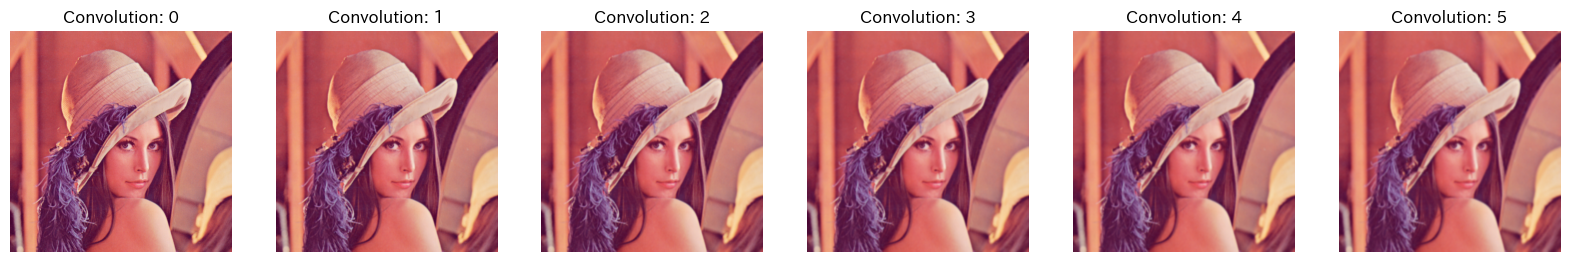

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request

# WebからLenna画像を読み込む
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
with urllib.request.urlopen(url) as url:
    image = Image.open(url)

print(type(image))
# PIL ImageオブジェクトをNumPy配列に変換
image = np.array(image)
print(type(image))
# ガウシアンフィルタの定義
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16

# 畳み込み処理を繰り返し適用
convolutions = 5
images = [image]
for _ in range(convolutions):
    image = cv2.filter2D(image, -1, kernel)
    images.append(image)

# 画像を表示
fig, axes = plt.subplots(1, convolutions + 1, figsize=(20, 5))
for i, img in enumerate(images):
    axes[i].imshow(img)
    axes[i].set_title(f'Convolution: {i}')
    axes[i].axis('off')
plt.show()



In [80]:
# Path: jupyterLab/work/chapter10.ipynb
# 保存したい場合はコメントを外して

# bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
# cv2.imwrite("./sample.jpg", bgr_image)

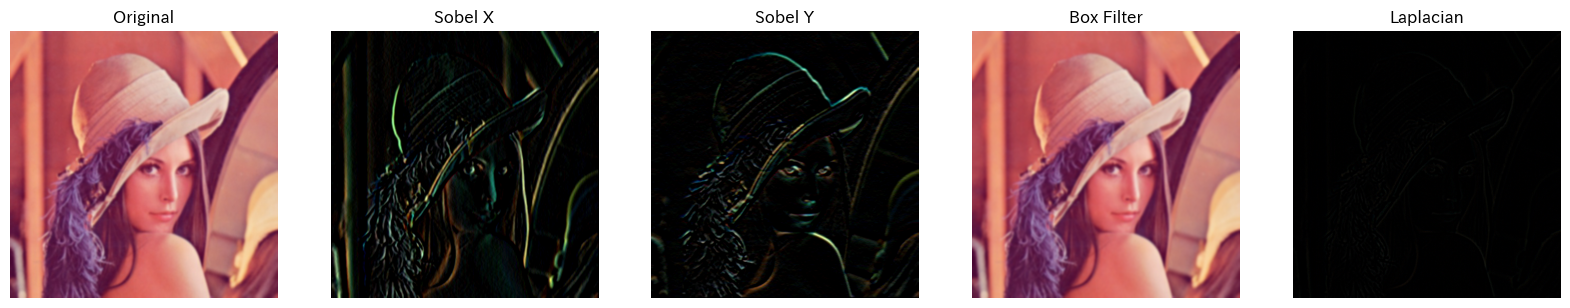

In [81]:
# 画像の読み込み
image_path = "sample.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# フィルタの定義
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

box_filter = np.ones((3, 3)) / 9

laplacian = np.array([[ 0,  1,  0],
                      [ 1, -4,  1],
                      [ 0,  1,  0]])

# 畳み込み処理
image_sobel_x = cv2.filter2D(image, -1, sobel_x)
image_sobel_y = cv2.filter2D(image, -1, sobel_y)
image_box = cv2.filter2D(image, -1, box_filter)
image_laplacian = cv2.filter2D(image, -1, laplacian)

# 画像を表示
images = [image, image_sobel_x, image_sobel_y, image_box, image_laplacian]
titles = ['Original', 'Sobel X', 'Sobel Y', 'Box Filter', 'Laplacian']

fig, axes = plt.subplots(1, len(images), figsize=(20, 5))
for i, img in enumerate(images):
    axes[i].imshow(img)
    axes[i].set_title(titles[i])
    axes[i].axis('off')
plt.show()

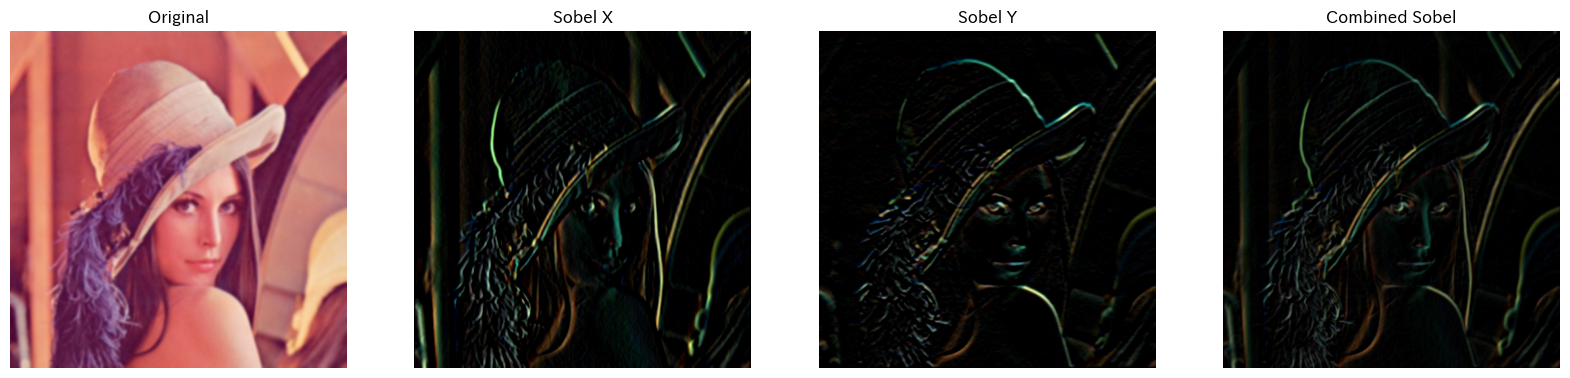

In [83]:
# Sobelフィルタの結果を重ねる
image_sobel_combined = cv2.addWeighted(np.abs(image_sobel_x), 0.5, np.abs(image_sobel_y), 0.5, 0)
# absはなくてもいいのだが、本来はつけるべきらしい。理由は
#matplotlib.pyplot.imshow()関数は、与えられたデータを自動的に正規化して表示します。つまり、データの最小値が0、最大値が1になるように調整して表示するため、負の値があっても問題なく表示できます。
#です。

# 画像を表示
images = [image, image_sobel_x, image_sobel_y, image_sobel_combined]
titles = ['Original', 'Sobel X', 'Sobel Y', 'Combined Sobel']

fig, axes = plt.subplots(1, len(images), figsize=(20, 5))
for i, img in enumerate(images):
    axes[i].imshow(img)
    axes[i].set_title(titles[i])
    axes[i].axis('off')
plt.show()


In [85]:
# Path: jupyterLab/work/chapter10.ipynb
# 保存したい場合はコメントを外して

#bgr_image = cv2.cvtColor(image_sobel_combined, cv2.COLOR_RGB2BGR)
#cv2.imwrite("./sample1.jpg", bgr_image)

True